# Wrangling the Range

In this activity, you’ll calculate a range of possible performance outcomes by using confidence intervals and the related z-scores.

Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information (from 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `V` (Visa)

    - `SQ` (Square, Inc.)

    - `GS` (Goldman Sachs)
 
> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_bars` function to make the API call. Be sure to set the `df` property at the end of the `get_bars` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

> **Hint** Use both the head and tail functions to display the first five and the last five rows of the DataFrame. You need the price of each stock on the last day of the period for later use in your confidence interval calculations.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all four stocks.

9. Based on your calculations and plots, answer the following questions: Which is the least volatile stock in the group? Which is the most volatile?

10. With a 95% confidence level, calculate the downside and upside performance expectations for both SPY and V based on the mean and standard deviation values.

11. With a 99% level of confidence, calculate the downside and upside performance expectations for both SQ and GS based on the mean and standard deviation values. 

12. Identify the lower and upper performance bounds for the start of each tail for SPY and SQ stocks. Note that the tail risk occurs when the performance measures outside the 99.7% confidence interval.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)



## Import the required libraries and dependencies

In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline

## Step 1: Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
# YOUR CODE HERE 
load_dotenv("api_keys.env")

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information (from 2019-05-01 to 2020-05-01) for the following stock tickers:

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 

In [5]:
# Create the list for the required tickers
tickers = ["SPY", "V", "SQ","GS"]

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2019-05-01", tz= "America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz= "America/New_York").isoformat()


In [7]:
# Set timeframe to one day (1Day)
# YOUR CODE HERE
timeframe= "1DAY"

In [8]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
V = prices_df[prices_df['symbol']=='V'].drop('symbol', axis=1)
SQ = prices_df[prices_df['symbol']=='SQ'].drop('symbol', axis=1)
GS = prices_df[prices_df['symbol']=='GS'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, V, SQ, GS], axis=1, keys=["SPY", "V", "SQ", "GS"])

# Review the first five rows of the resulting DataFrame 
# YOUR CODE HERE
prices_df.head()

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2019-05-01 04:00:00+00:00  294.72  294.95  291.8000  291.82   71921870   
2019-05-02 04:00:00+00:00  291.68  292.70  289.5200  291.13   65058183   
2019-05-03 04:00:00+00:00  292.82  294.34  291.2998  293.98   56579556   
2019-05-06 04:00:00+00:00  289.25  293.31  288.9000  292.83  107250892   
2019-05-07 04:00:00+00:00  290.15  290.81  285.8100  288.05  145292657   

                                                        V                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-05-01 04:00:00+00:00      337374  293.457138  165.54  165.74  162.75   
2019-05-02 04:00:00+00:00      342564  291.101680  162.10  163.08  160.43   
2019-05-03 04:00:00+00:00      249557  293.438891  162.30  162.74  161.18   
2019-05-06 04:00:00+00:00      390959  291.952803  158.21  162.65  158.20   
2019-05-07 04:00:00+00:00      618594  288.280747  160.95  161.78  158.68   

                           ...        SQ                             GS  \
                           ...    volume trade_count       vwap    open   
timestamp                  ...                                            
2019-05-01 04:00:00+00:00  ...  15772849       97246  73.158542  206.40   
2019-05-02 04:00:00+00:00  ...  34399626      206113  67.838142  204.43   
2019-05-03 04:00:00+00:00  ...   9259353       67481  68.213814  206.01   
2019-05-06 04:00:00+00:00  ...  13595822       77118  68.837782  202.80   
2019-05-07 04:00:00+00:00  ...  10764077       72945  68.344274  203.34   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2019-05-01 04:00:00+00:00  208.4086  204.03  204.73  1981789       25133   
2019-05-02 04:00:00+00:00  206.2200  203.12  204.99  1514660       20898   
2019-05-03 04:00:00+00:00  208.7500  205.67  207.52  1897692       24043   
2019-05-06 04:00:00+00:00  206.9800  201.71  206.43  1927994       23664   
2019-05-07 04:00:00+00:00  204.0000  201.01  202.63  2839464       32157   

                                       
                                 vwap  
timestamp                              
2019-05-01 04:00:00+00:00  205.716265  
2019-05-02 04:00:00+00:00  204.848131  
2019-05-03 04:00:00+00:00  207.379014  
2019-05-06 04:00:00+00:00  204.807924  
2019-05-07 04:00:00+00:00  202.373376  

[5 rows x 28 columns]

## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [9]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = pd.DataFrame()

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
   closing_prices_df[ticker]= prices_df[ticker]["close"]

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [10]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df = closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the daily_returns_df DataFrame



## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [11]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Give the plot a title and adjust the figure size
# YOUR CODE HERE 
daily_returns_df.describe()

,SPY,V,SQ,GS
count,253.000000,253.000000,253.000000,253.000000
mean,0.000058,0.000623,0.000242,-0.000211
std,0.018983,0.025507,0.040574,0.026883
min,-0.107828,-0.138600,-0.285615,-0.127053
25%,-0.004727,-0.007360,-0.015913,-0.009066
50%,0.000830,0.001626,0.002517,0.000566
75%,0.006934,0.009594,0.016612,0.011213
max,0.086761,0.138426,0.157461,0.138031


## Step 8: Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

<AxesSubplot:title={'center':'Daily Returns'}, ylabel='Frequency'>

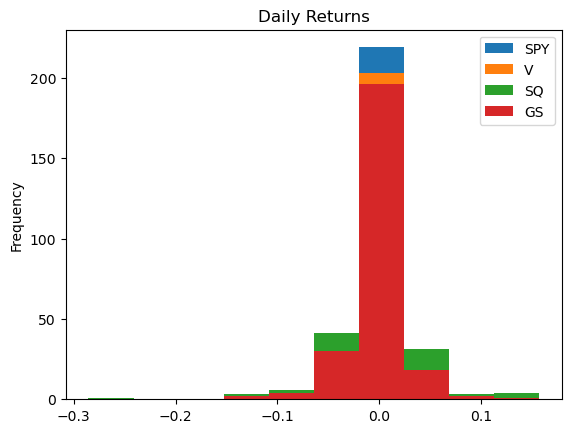

In [12]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size 
# YOUR CODE HERE 
daily_returns_df.plot.hist(title="Daily Returns")

<AxesSubplot:title={'center':'Daily Returns Density Plot'}, ylabel='Density'>

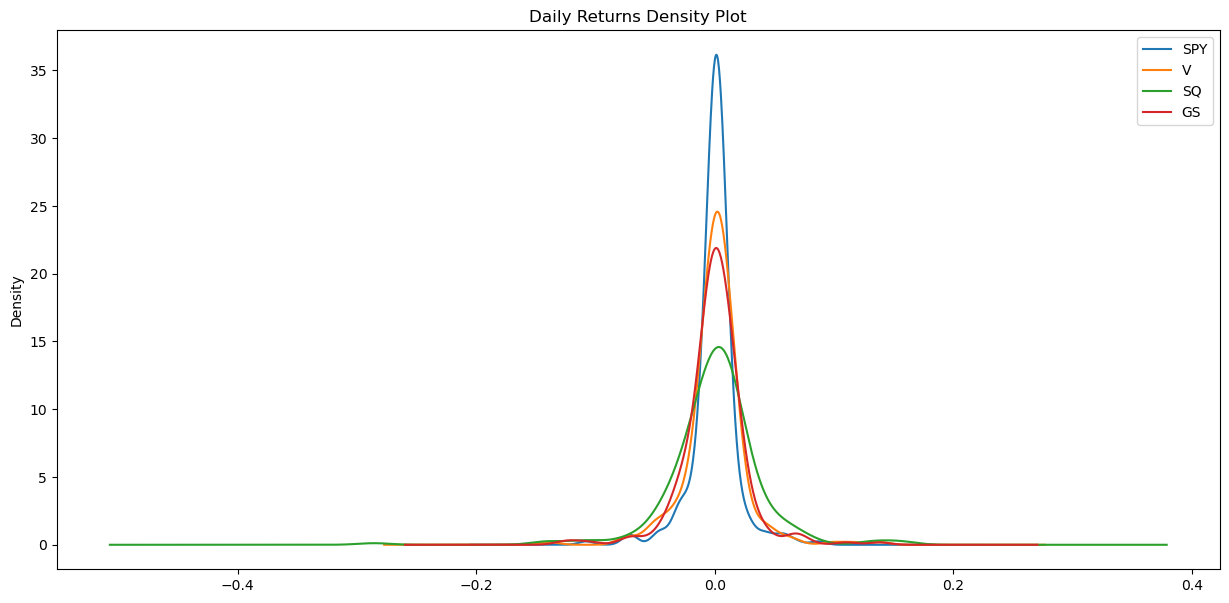

In [13]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size 
daily_returns_df.plot.density(
    figsize=(15,7), 
    title="Daily Returns Density Plot"
)

## Step 9: Answer the following question. 

**Question:** Which is the least volatile stock in the group? Which is the most volatile?
    
**Answer:** Least Volatile is the SPY and the most is SQ

## Step 10: With a 95% confidence level, calculate the downside and upside performance expectations for both SPY and V based on the mean and standard deviation values.

In [19]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for the SPDR S&P 500 ETF Trust (ticker: SPY)
# Calculate the upside and downside performance expectations using a 95% confidence interval.
# The z-score associated with a 95% confidence interval is 1.96.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_SPY = (daily_returns_df["SPY"].mean())- (1.96* (daily_returns_df["SPY"].std()))

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_SPY = (daily_returns_df["SPY"].mean())+ (1.96* (daily_returns_df["SPY"].std()))

# Print the expected range of SPY's performance
# YOUR CODE HERE 
print(f"Using a 95% confidence interval, the SPDR S&P 500 ETF Trust could trade down as much as {downside_SPY}", f"and up as much as  {upside_SPY}")

Using a 95% confidence interval, the SPDR S&P 500 ETF Trust could trade down as much as -0.03714985049136959 and up as much as  0.03726506661455296


In [20]:
# Based on the daily return summary statistics, access the mean and standard deviation
# values for stock Visa (ticker: V)
# Calculate the upside and downside performance expectations using a 95% confidence interval
# The z-score associated with a 95% confidence interval is 1.96

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_V = (daily_returns_df["V"].mean())- (1.96* (daily_returns_df["V"].std()))

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_V = (daily_returns_df["V"].mean())+ (1.96* (daily_returns_df["V"].std()))

# Print the expected range of Visa's performance
# YOUR CODE HERE 
print(f"Using a 95% confidence interval, the SPDR S&P 500 ETF Trust could trade down as much as {downside_V}", f"and up as much as  {upside_V}")

Using a 95% confidence interval, the SPDR S&P 500 ETF Trust could trade down as much as -0.049371425758753834 and up as much as  0.050616542987637


## Step 11: With a 99% level of confidence, calculate the downside and upside performance expectations for both SQ and GS based on the mean and standard deviation values. 

In [16]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for Square, Inc. (ticker: SQ). 
# Calculate the upside and downside performance expectations using a 99% confidence interval.
# The z-score associated with a 99% confidence interval is 2.576.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_SQ = # YOUR CODE HERE 

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_SQ = # YOUR CODE HERE 

# Print the expected range of Square, Inc's performance.
# YOUR CODE HERE 

Using a 99% confidence interval, Square, Inc. could trade down as much as -10.4578%, and up as much as  10.5062%.


In [17]:
# Based on the daily return summary statistics, access the mean and standard deviation 
# values for Goldman Sachs (ticker: GS). 
# Calculate the upside and downside performance expectations using a 99% confidence interval.
# The z-score associated with a 99% confidence interval is 2.576.

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_GS = # YOUR CODE HERE 

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_GS = # YOUR CODE HERE 

# Print the expected range of Goldman Sach's performance.
# YOUR CODE HERE 

Using a 99% confidence interval, Goldman Sachs could trade down as much as -7.4650%, and up as much as  7.4340%.


## Step 12: Identify the lower and upper performance bounds for the start of each tail for SPY and SQ stocks. Note that the tail risk occurs when the performance measures outside the 99.7% confidence interval.

In [22]:
# Based on the daily return summary statistics, access the mean 
# and standard deviation values for the SPDR S&P 500 ETF Trust (ticker: SPY)
# Identify the lower and upper bounds associated with the tail risk measures
# The tail risk occurs when performance measures outside 
# of the 99.7% confidence interval, or a z-score of 3

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_tail_SPY = (daily_returns_df["SPY"].mean())- (3* (daily_returns_df["SPY"].std()))

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_tail_SPY = (daily_returns_df["SPY"].mean())+ (3* (daily_returns_df["SPY"].std()))

# Print the expected range of the SPY's performance
# YOUR CODE HERE 
print(f"There is a probability of 0.15% that the SPDR S&P 500 ETF Trust could trade down more than{downside_tail_SPY}",f" or that it could trade up more than  {upside_tail_SPY}")

There is a probability of 0.15% that the SPDR S&P 500 ETF Trust could trade down more than-0.05689258360110414  or that it could trade up more than  0.05700779972428751


In [19]:
# Based on the daily return summary statistics, access the mean 
# and standard deviation values for Square, Inc. (ticker: SQ). 
# Identify the lower and upper bounds associated with the tail risk measures. 
# The tail risk occurs when performance measures outside 
# of the 99.7% confidence interval, or a z-score of 3 

# Calculate the downside performance expectation:
# downside performane = mean - (z-score * standard deviation)
downside_tail_SQ = # YOUR CODE HERE 

# Calculate the upside performance expectation:
# upside performane = mean + (z-score * standard deviation)
upside_tail_SQ = # YOUR CODE HERE 

# Print the expected range of the Square Inc's performance
# YOUR CODE HERE 

There is a probability of 0.15% that the Square, Inc. could trade down more than -12.1831%, or that it could trade up more than  12.2315%.
